# Helicopter Prison Escapes

The aim of this project is to analyse helicopter escapes recorded on [https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes). From the data we aim to answer two key questions:

- In which year did the most helicopter prison break attempts occur?
- In which countries do the most attempted helicopter prison escapes occur?

We begin first by importing some helper functions. 

In [1]:
from helper import *

## Getting the Data

Next we use the data_from_url function to scrape the data from the data table on the Wikipedia page to analyze throughout this project. We will output the first three rows to understand how the data has been read.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts'
data = data_from_url(url)
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the

## Removing the Details

The data has been read as a list of lists. The first layer represents the each row of the data, without the header row, and each list within each row contains 6 columns:

| Column Name |                  Description                 |
|:-----------:|:--------------------------------------------:|
|     Date    | Date of the escape in "mmmm dd, yyyy" format |
| Prison Name |              Name of the prison              |
|   Country   |             Country of the escape            |
|  Succeeded  |   Whether or not the prison break succeeded  |
|   Escapees  |            Name(s) of the escapees           |
|   Details   |             Details of the escape            |

We will remove the Details columns as they are not important to our analysis. We do this by looping through the first layer of the list and then re-assign the list without the last entry of the list.

In [3]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Extracting the Year

Next, we can start by answering the first question in the scope of the project by extracting the year and then replace the date with the year. We do this using another helper function "fetch_year" on the first item of the list which is the date.

In [4]:
for row in data:
    row[0] = fetch_year(row[0])

print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Attempts per Year

Before we move on it's a good practice to understand the range of the data, which is by identifying the year of the first and last escape in our dataset. We do this by using the Python "min" and "max" built-in functions, setting the years of the attempts as the keys for these functions to perform on. 

In [5]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print('The earliest year in the dataset is ' + str(min_year))
print('The latest year in the dataset is ' + str(max_year))

The earliest year in the dataset is 1971
The latest year in the dataset is 2020


At the time of writing, the earliest year in the dataset is 1971 and the lastest year is 2020. Wikipedia notes that this list in incomplete so the earliest and latest years may change when re-running this analysis in the fugure. 

Next we isolate the years of the escapes for us to perform the next step of the analysis.

In [6]:
years = []

for row in data:
    years.append(row[0])

print(years)

[1971, 1973, 1978, 1981, 1981, 1983, 1985, 1985, 1986, 1986, 1986, 1987, 1988, 1989, 1989, 1990, 1991, 1992, 1992, 1993, 1996, 1997, 1999, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2003, 2005, 2005, 2006, 2007, 2007, 2007, 2009, 2009, 2009, 2010, 2012, 2013, 2013, 2014, 2016, 2018, 2020]


Each year in the "years" list represent an attempt, so our next step is to count number of times each year appears in the list. In order to better utilise matplotlib to visualise the distribution, we will store the attempts per year as a nested list, in the form [year, count], called "attempts_per_year". 

To do this we must initialize a list of lists with each of the years as the first item then 0 as the second item. Then we set up a double for loop to first loop through the years and then update the "attempts_per_year" adding one year to the appropriate year.

In [7]:
attempts_per_year = [[x, 0] for x in range(min_year, max_year+1)]

for year in years:
    for ya in attempts_per_year:
        if ya[0] == year:
            ya[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


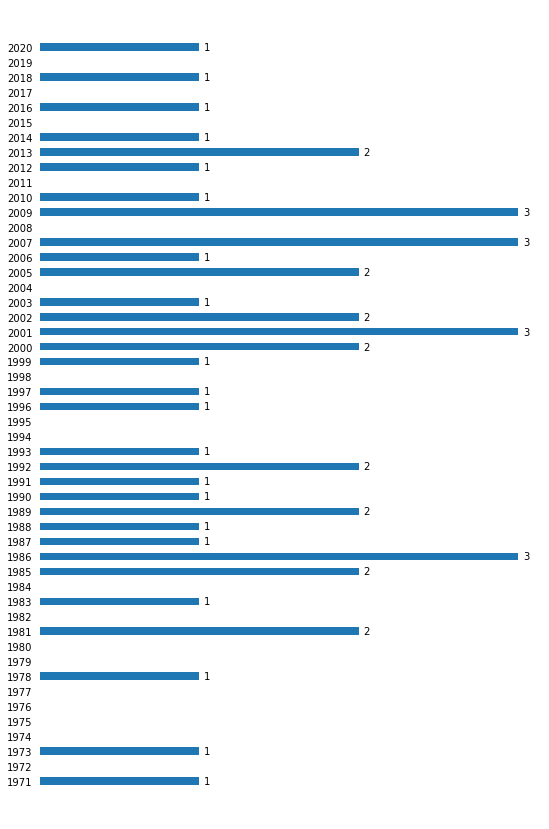

In [8]:
%matplotlib inline
barplot(attempts_per_year)

We see that the years that had the helicopter escapes occur is attempts occur is in 1986, 2001, 2007 and 2009 with 3 attempts each. 

## Attempts per Country

To answer the second question we are able to utilise the data which was read into the Pandas dataframe allowing us to utilies the value_count() method to create a frequency table. 

In [9]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


We see that the country that had the most helicopter escaptes attempts occur is France.

## Further Analysis

Further analysis we can perform on the dataset includes finding the countries and years which had the most number of successful attempts. To do this we need to create a list which only contains rows which has successful escapes. We know that in the original "data" variable, the fourth column contains whether the attempt was successful, this allows us to filter the data based on the content of that column. We print the first three rows to verify the code was successful.

In [10]:
successes = [x for x in data if x[3] == 'Yes']
print(successes[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']]


Next we answer the first question by reusing the same code modifying the attempts to escapes.

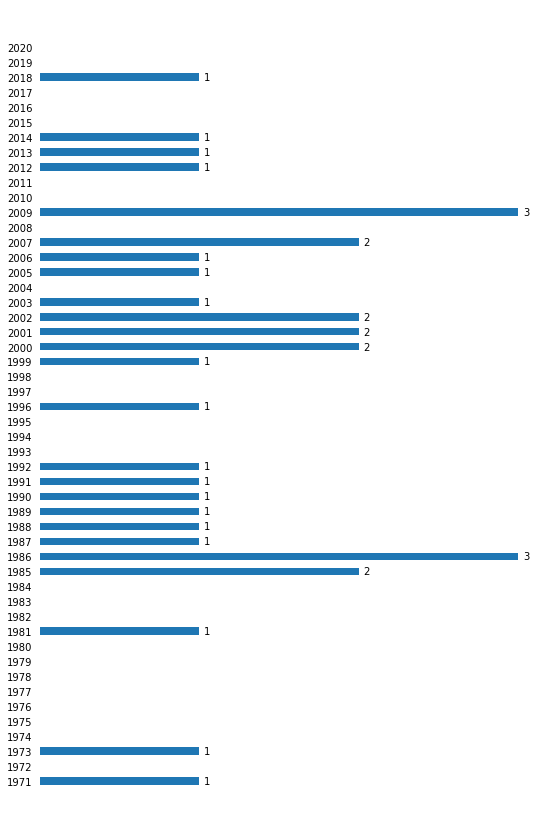

In [11]:
escapes_per_year = [[x, 0] for x in range(min_year, max_year+1)]
escapes = [x[0] for x in successes]

for y in escapes:
    for ya in escapes_per_year:
        if ya[0] == y:
            ya[1] += 1

%matplotlib inline
barplot(escapes_per_year)

We see that in 1986 and 2009 we have the most number of escapes of 3

Next we find out which country has the most number of escapes.

In [12]:
df[df['Succeeded'] == 'Yes']['Country'].value_counts().to_frame('Escapes')

,Escapes
France,11
United States,6
Canada,3
Brazil,2
Greece,2
Belgium,2
Mexico,1
Ireland,1
Italy,1
United Kingdom,1


We see that France has the most number of escapes at 11.

## Insights

We see the answers to the initial questions for attempts and escapes both yield similar answers. We ask the question why is that the case? 

A clue to that answer would be to see the success rate of an attempt given an attempt:

In [13]:
print('The number of escapes attempts are ' + str(len(data)))
print('The number of successful escapes are ' + str(len(successes)))
print('The success rate of an escape attempt is {sr:,.2f}%'.format(sr = 100 * len(successes) / len(data)))

The number of escapes attempts are 48
The number of successful escapes are 34
The success rate of an escape attempt is 70.83%


We notice that the success rate of an escape attempt is 70.83% which means that the number of escapes form a large subset of the overall dataset, making the subset of data very representative of the overall dataset. 

Now we can ask another question, which is why is the success rate of a given prison escape attempt so high? As the common understanding of prison is that it is a very secure facility making it a very difficult place to escape. A few are important to point out when answering this question:

- The prisoner escaped by helicopter meaning that the escape attempt had significant assistance from the outside
- The number of escapes is very small with only 48 attempts over 49 years which is less than 1 attempt per year

We can conclude that while a prison is a very secure location is because of the security measures within the prison which prevents many escape attempts in the first place. What we see is only a small subset of the actual attempts of prison escapes as the escapes which were caught by the security measures aren't recorded, so the data here isn't very representative of all prison escapes that takes place. The data is more representative of the prison attempts which made it pass the internal security measures in order to be publically recorded. 

This highlights that a prison escape can be thought of as a means to bypass both the internal security measures within the prison culminating in breaching the prison walls which servers as the external physical security measure. Given the prisoner had access to a helicopter meant the prisoners had a lot of assistance bypassing the physical security measure, which explains why prison escapes attempts by helicopters success rate is so high.